## Get the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)  # extract features and labels

from sklearn.model_selection import train_test_split

## Methods

### K-nearest neighbors classifier

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label of the new point from these. This is the simplest possible classifier.

Put simply the KNN classifier takes the k closest neighbours of an unlabelled datapoint, measures closeness according to all relevant dimensions and classifies unlabelled data point by majority vote. Thereby the classifier creates a set of **'decision boundaries'**.

The number k determines how many samples are considered relevant neighbors. A <u>low k is selective and fits the labels close to the training data</u>. This implies a complex model that is prone to **overfitting**. A high k is inclusive. It implies a smooth decision boundary and a simpler model, but - if taken too far - runs the risk of ignoring training data patterns, i.e **underfitting**.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3, random_state=21, stratify=iris_y)

knn = KNeighborsClassifier(n_neighbors=5)  # instantiate estimator
knn.fit(X_train, y_train)  # fit the estimator
y_pred = knn.predict(X_test)  # predict test targets

N.B.: **Stratified sampling** is a method of sampling from a population by dividing members of the population into homogeneous subgroups. The use stratified sampling ensures that relative class frequencies are approximately preserved in train/validation folds.

## Evaluation

### Binary classification

In [14]:
X, y = datasets.load_iris(return_X_y=True) 
y = ['pos' if (i == 2) else 'neg' for i in y]  # convert classes to binary base

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=iris_y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # instantiate estimator
knn.fit(X_train, y_train)  # fit the estimator
y_pred = knn.predict(X_test)  # predict test targets

A **confusion matrix** informs on predicted and actual classifications. In the binary case, the stylized labels of often positives (class of interest) and negatives. The confusion matrix of a prediction model divides all cases into four categories: 
* A *true positive* is a case that is classified and predicted as positive.
* A *false positive* is a case that is classified as positive but predicted as negative.
* A *true negative* is a case that is classified and predicted as negative.
* A *false negative*  is a case that is classified as negative but predicted as positive.

Binary classification evaluation metrics are calculated based on the frequencies of these categories.

[[0.64444444 0.02222222]
 [0.         0.33333333]]


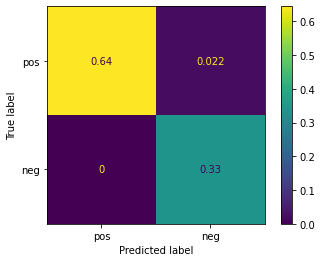

In [17]:
from sklearn import metrics
cfm = metrics.confusion_matrix(y_test, y_pred, normalize='all', labels = ['pos', 'neg'])  # simple normalized confusion matrix
print(cfm)
metrics.plot_confusion_matrix(knn, X_test, y_test, normalize='all', labels = ['pos', 'neg'])  # applied directly to model

Key confusion-based evaluation metrics include the following:

* **Accuracy**, the fraction of correctly classified samples. In the binary case it is the ratio of true positives and true negatives to all labelled cases, where means correctly labelled by the model. However, accuracy may not br meaningful for data with *class imbalance*, i.e. some classes being dominant. For example, for a binary series with dominant positive values, accuracy mainly depends on the correct labelling of the positive cases. The correct labelling of negative cases would not matter much.

* **Precision** is the ratio of true positives, i.e. correctly labelled positives, to all cases (true and false or correcty and incorrectly labelled) that are classified as positives. This is a useful metric if the prediction of positives should be as 'precise' as possible, i.e  capture positives without capturing too many negatives. It is a metric of avoidance of mistakes.

* **Recall** is the ratio of true to positives to all cases that are classified as positives. This is also call hit rate and makes sense if the main objective is to catch as many positives as possible. There is no penalty for incorrectly labelled positives. It is metric of avoidance of missing out. In binary classification, recall of the positive class is also known as **sensitivity** and the recall of the negative class as **specificity**.

There is evidently a trade-off between precision and recall. The greater the emphasis on avoiding false positives, the greater the emphasis on precision. The more one focuses on avoiding missing out on positive, the greater the emphasis on recall.
In a classifier the trade-off is often managed through the threshold level that divides the classification. Typically, <u>a low threshold gives low precision but high recall</u>. A high threshold gives high precision but low recall.
The **Receiver Operating Characteristic (ROC) curve** shows how the recall versus precision relationship changes as we vary the threshold for identifying a positive in our model.
* For a good blend of precision and recall we can combine the two metrics to an the **F1 score**. The F1 score is the <u>harmonic mean of precision and recall values</u>, taking both metrics into account. It is precision times recall divided by the average of precision and recall. The harmonic mean punishes extreme values. SKL offers various F1 scores for binary, averaged, and multilabel samples.
* The **average precision score** summarizes a precision-recall curve as the <u>weighted mean of precisions achieved at each threshold</u>, with the increase in recall from the previous threshold used as the weight. This only works with a binary class.

Note that <u>precision, recall and F1 score are specific to the class</u>. This means that they are generally different for positives and negatives. Hence, it matters what we consider to be the 'class of interest'. Since, sklearn does not know what is of interest it calculates the statistics for both classes.


In [23]:
print(metrics.classification_report(y_test, y_pred, labels = ['pos', 'neg']))

              precision    recall  f1-score   support

         pos       1.00      0.97      0.98        30
         neg       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In its default classification report sklearn also informs about the following:

* **Support** gives the number of samples of the true response that lie in the respective class.
* **Macro average** gives the average unweighted mean of precision/recall/F1 across labels.
* **Weighted average** gives the support-weighted mean of  precision/recall/F1 across labels.

## Tryouts